In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#loading the given csv data
data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Passenger ID as index column

In [3]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Details of Dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
#finding the missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Filling the missing values

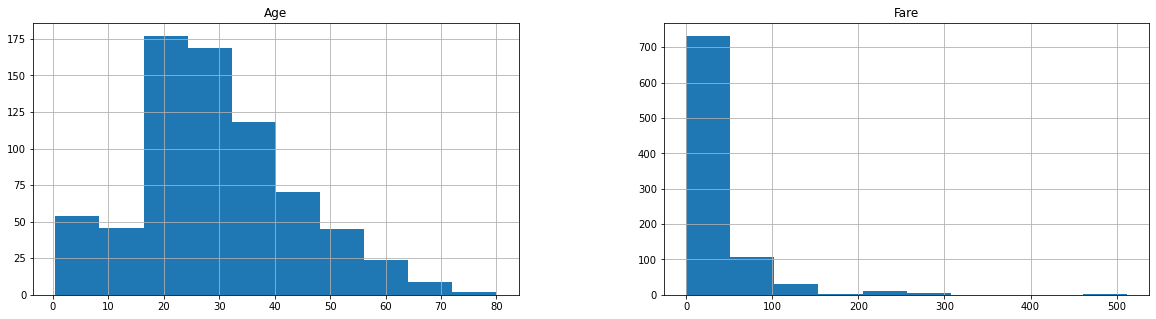

In [8]:
#Checking the variation
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,5))
plt.show()

## Filling missing values for age

In [9]:
for i in ['Age']:
    data[i] = data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Filling missing values for cabin

In [11]:
#making all null values as "M" for Missing
cab_col = data['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [12]:
type(cab_col)

pandas.core.series.Series

In [13]:
#Changing to dataframe
cab_col = pd.DataFrame(cab_col)

In [14]:
type(cab_col)

pandas.core.frame.DataFrame

In [15]:
cab_col.isna().sum()

Cabin    0
dtype: int64

In [16]:
#dropping Cabin column
data.drop(['Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
#concatenating cab_col with data
data = pd.concat([cab_col,data],axis=1)
data.head()

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
1,M,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,C,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,M,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,C,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,M,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
df = pd.DataFrame(data)
df

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
1,M,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,C,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,M,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,C,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,M,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
887,M,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,B,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,M,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


## Filling values for Embarked

In [19]:
#checking null values
df.loc[df['Embarked'].isnull()]

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
62,B,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,B,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.loc[(df['Pclass'] == 1) & (df['Fare']<=80) & (df['Cabin'] == 'B')]['Embarked'].value_counts()

C    12
S    11
Name: Embarked, dtype: int64

In [22]:
#After cross-checking the value counts null value is assigned 'S'
df.loc[df['Embarked'].isnull(),'Embarked'] = 'S'

In [23]:
#checking null values
df.isna().sum()

Cabin       0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [24]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Feature selection

In [25]:
df.drop(['Name', 'Ticket','Cabin'],axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
columns =['Pclass','Sex','Embarked']
label_encoder = LabelEncoder()
for i in columns:
    df[i]=label_encoder.fit_transform(df[i])

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,2,1,22.0,1,0,7.2500,2
2,1,0,0,38.0,1,0,71.2833,0
3,1,2,0,26.0,0,0,7.9250,2
4,1,0,0,35.0,1,0,53.1000,2
5,0,2,1,35.0,0,0,8.0500,2


In [29]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [31]:
#Preparing inputs and outputs
X = df.drop('Survived',axis=1)
y = df['Survived']

In [32]:
#splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.1)

In [33]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#setting the range
neighbors=range(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)

In [34]:
score_knn = classifier.score(X_test,y_test)
score_knn

0.7888888888888889

In [35]:
from sklearn.svm import SVC
#create SVM object with kernel as linear
svm_clf = SVC(kernel='linear')
svm_df = svm_clf.fit(X_train,y_train)

In [36]:
score_svm = svm_clf.score(X_test,y_test)
score_svm

0.8111111111111111

In [37]:
#create SVM object with kernel as rbf
#svm_clf = SVC(kernel='rbf')
#svm_df = svm_clf.fit(X_train,y_train)

In [38]:
#score_svm = svm_clf.score(X_test,y_test)
#score_svm

# Cross Validation

## K-Fold

In [39]:
from sklearn.model_selection import KFold

In [40]:
#Dividing dataset into k groups or folds
kfold_validator = KFold(15)

In [41]:
#Repeat process k times using different set each time as the hold out set
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index :', train_index)
    print('Validation_Index :', test_index)

Training Index : [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 3

In [42]:
#cross_val_score is used to test whether the model can generalise over the whole dataset
from sklearn.model_selection import cross_val_score

### knn

In [43]:
#calculating cross_val_score for knn model
cv_result = cross_val_score(classifier,X,y, cv=kfold_validator)
cv_result

array([0.56666667, 0.71666667, 0.65      , 0.65      , 0.68333333,
       0.76666667, 0.72881356, 0.6779661 , 0.76271186, 0.71186441,
       0.71186441, 0.76271186, 0.83050847, 0.72881356, 0.72881356])

In [44]:
#calculating mean
np.mean(cv_result)

0.7118267419962336

### svm

In [45]:
#calculating cross_val_score for svm model
cv_result = cross_val_score(svm_clf,X,y, cv=kfold_validator)
cv_result

array([0.8       , 0.8       , 0.85      , 0.76666667, 0.73333333,
       0.88333333, 0.77966102, 0.77966102, 0.79661017, 0.72881356,
       0.72881356, 0.74576271, 0.81355932, 0.77966102, 0.81355932])

In [46]:
#calculating mean
np.mean(cv_result)

0.7866290018832391

## Stratified 

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
skfold_validator = StratifiedKFold(n_splits=15)

In [49]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index :', train_index)
    print('Validation_Index :', test_index)

Training Index : [ 53  55  56  58  61  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 3

### knn

In [50]:
cv_result = cross_val_score(classifier,X,y, cv=skfold_validator)
cv_result

array([0.61666667, 0.66666667, 0.63333333, 0.66666667, 0.75      ,
       0.76666667, 0.76271186, 0.6779661 , 0.71186441, 0.71186441,
       0.71186441, 0.77966102, 0.77966102, 0.72881356, 0.71186441])

In [51]:
#calculating mean
np.mean(cv_result)

0.7117514124293786

### svm

In [52]:
#calculating cross_val_score for svm model
cv_result = cross_val_score(svm_clf,X,y, cv=kfold_validator)
cv_result

array([0.8       , 0.8       , 0.85      , 0.76666667, 0.73333333,
       0.88333333, 0.77966102, 0.77966102, 0.79661017, 0.72881356,
       0.72881356, 0.74576271, 0.81355932, 0.77966102, 0.81355932])

In [53]:
#calculating mean
np.mean(cv_result)

0.7866290018832391

## > Knn model is better than svm model based on cross validation